# Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from scipy import stats

In [2]:
!pip install mlxtend 

In [3]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [4]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Set Options

In [5]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Read Data

In [6]:
# read csv file using pandas
pp = pd.read_csv('HousePrices.csv')

# display the top 5 rows of the dataframe
pp.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#display the last 5 rows of the data frame
pp.tail()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,RRNn,Norm,1Fam,2Story,8,4,1936,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,298.0,Gd,TA,PConc,Gd,TA,No,ALQ,772,Unf,0,220,992,GasA,Ex,Y,SBrkr,1022,1038,0,2060,1,0,2,1,3,1,Gd,8,Typ,1,TA,BuiltIn,1999.0,RFn,2,390,TA,TA,Y,0,0,0,168,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,6,9,1936,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,TA,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,321,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,4,6,1983,1996,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2017.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,9,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
2072,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,9,9,1890,1996,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,1088,Unf,0,0,1088,GasA,TA,Y,SBrkr,1188,561,120,1869,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1963.0,Unf,2,456,TA,TA,Y,48,0,244,0,0,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900


# Dimension of data

In [8]:
# 'shape' function gives the total number of rows and columns in the data
pp.shape

(2073, 81)

# Understand the data

In [9]:
# 'dtypes' gives the data type for each column
pp.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

# Let us remove the Id column as this will not be necessary for our analysis

In [10]:
pp.drop(['Id'], axis=1, inplace=True)

# Summary Statistics

# 1. For numerical variables, use the describe()

In [11]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
pp.describe()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# For categorical variables, use the describe(include=object)

In [12]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of categorical variables
pp.describe(include=object )

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


# To check null values

In [13]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   int64  
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          1753 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                129 non-null    object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

# As, PoolQC have only 7 non-zero values out of 1460 observations. And, the variable PoolArea contains the area of these 7 pools; thus, we remove the variables PoolQC and PoolArea.

In [14]:
# use drop() to drop the redundant variables
# 'axis = 1' drops the corresponding columns
pp = pp.drop(['PoolQC', 'PoolArea'], axis= 1)

# re-check the shape of the dataframe
pp.shape

(2073, 78)

# Distribution of variables

In [15]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = pp.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Property_Sale_Price'],
      dtype='object')

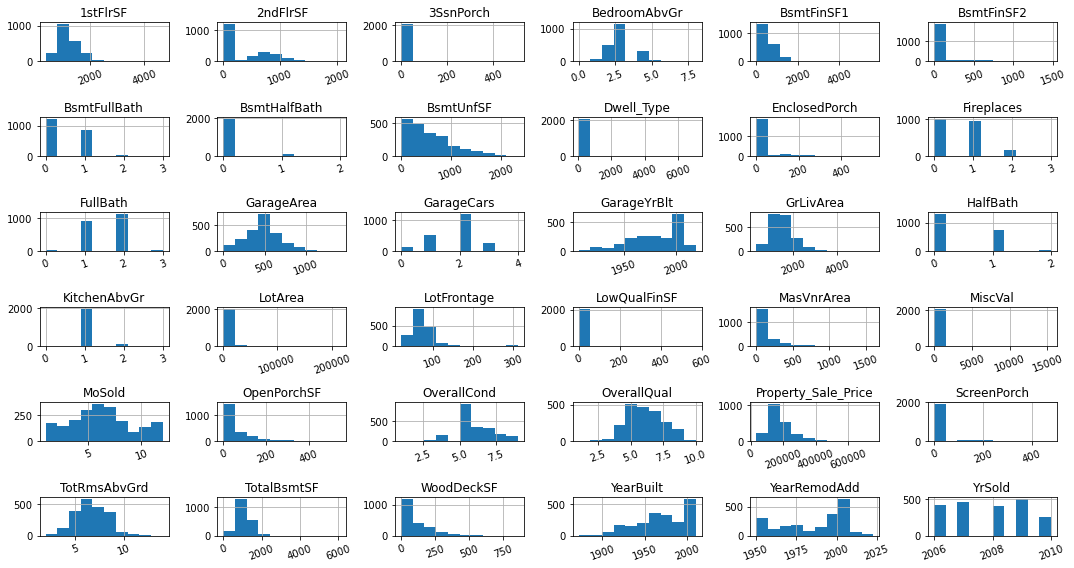

In [16]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
pp.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# Visualize the target variable

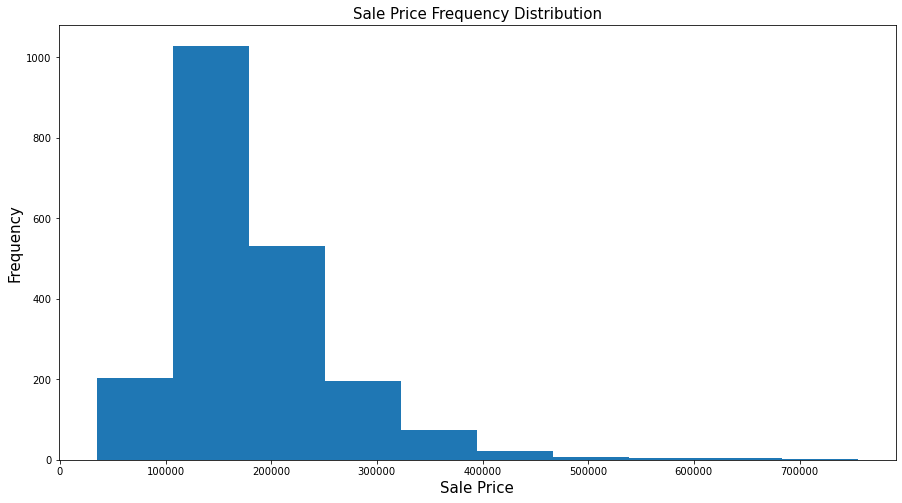

In [17]:
# Sale Price Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(pp["Property_Sale_Price"])
plt.show()

# Distribution of categoric value

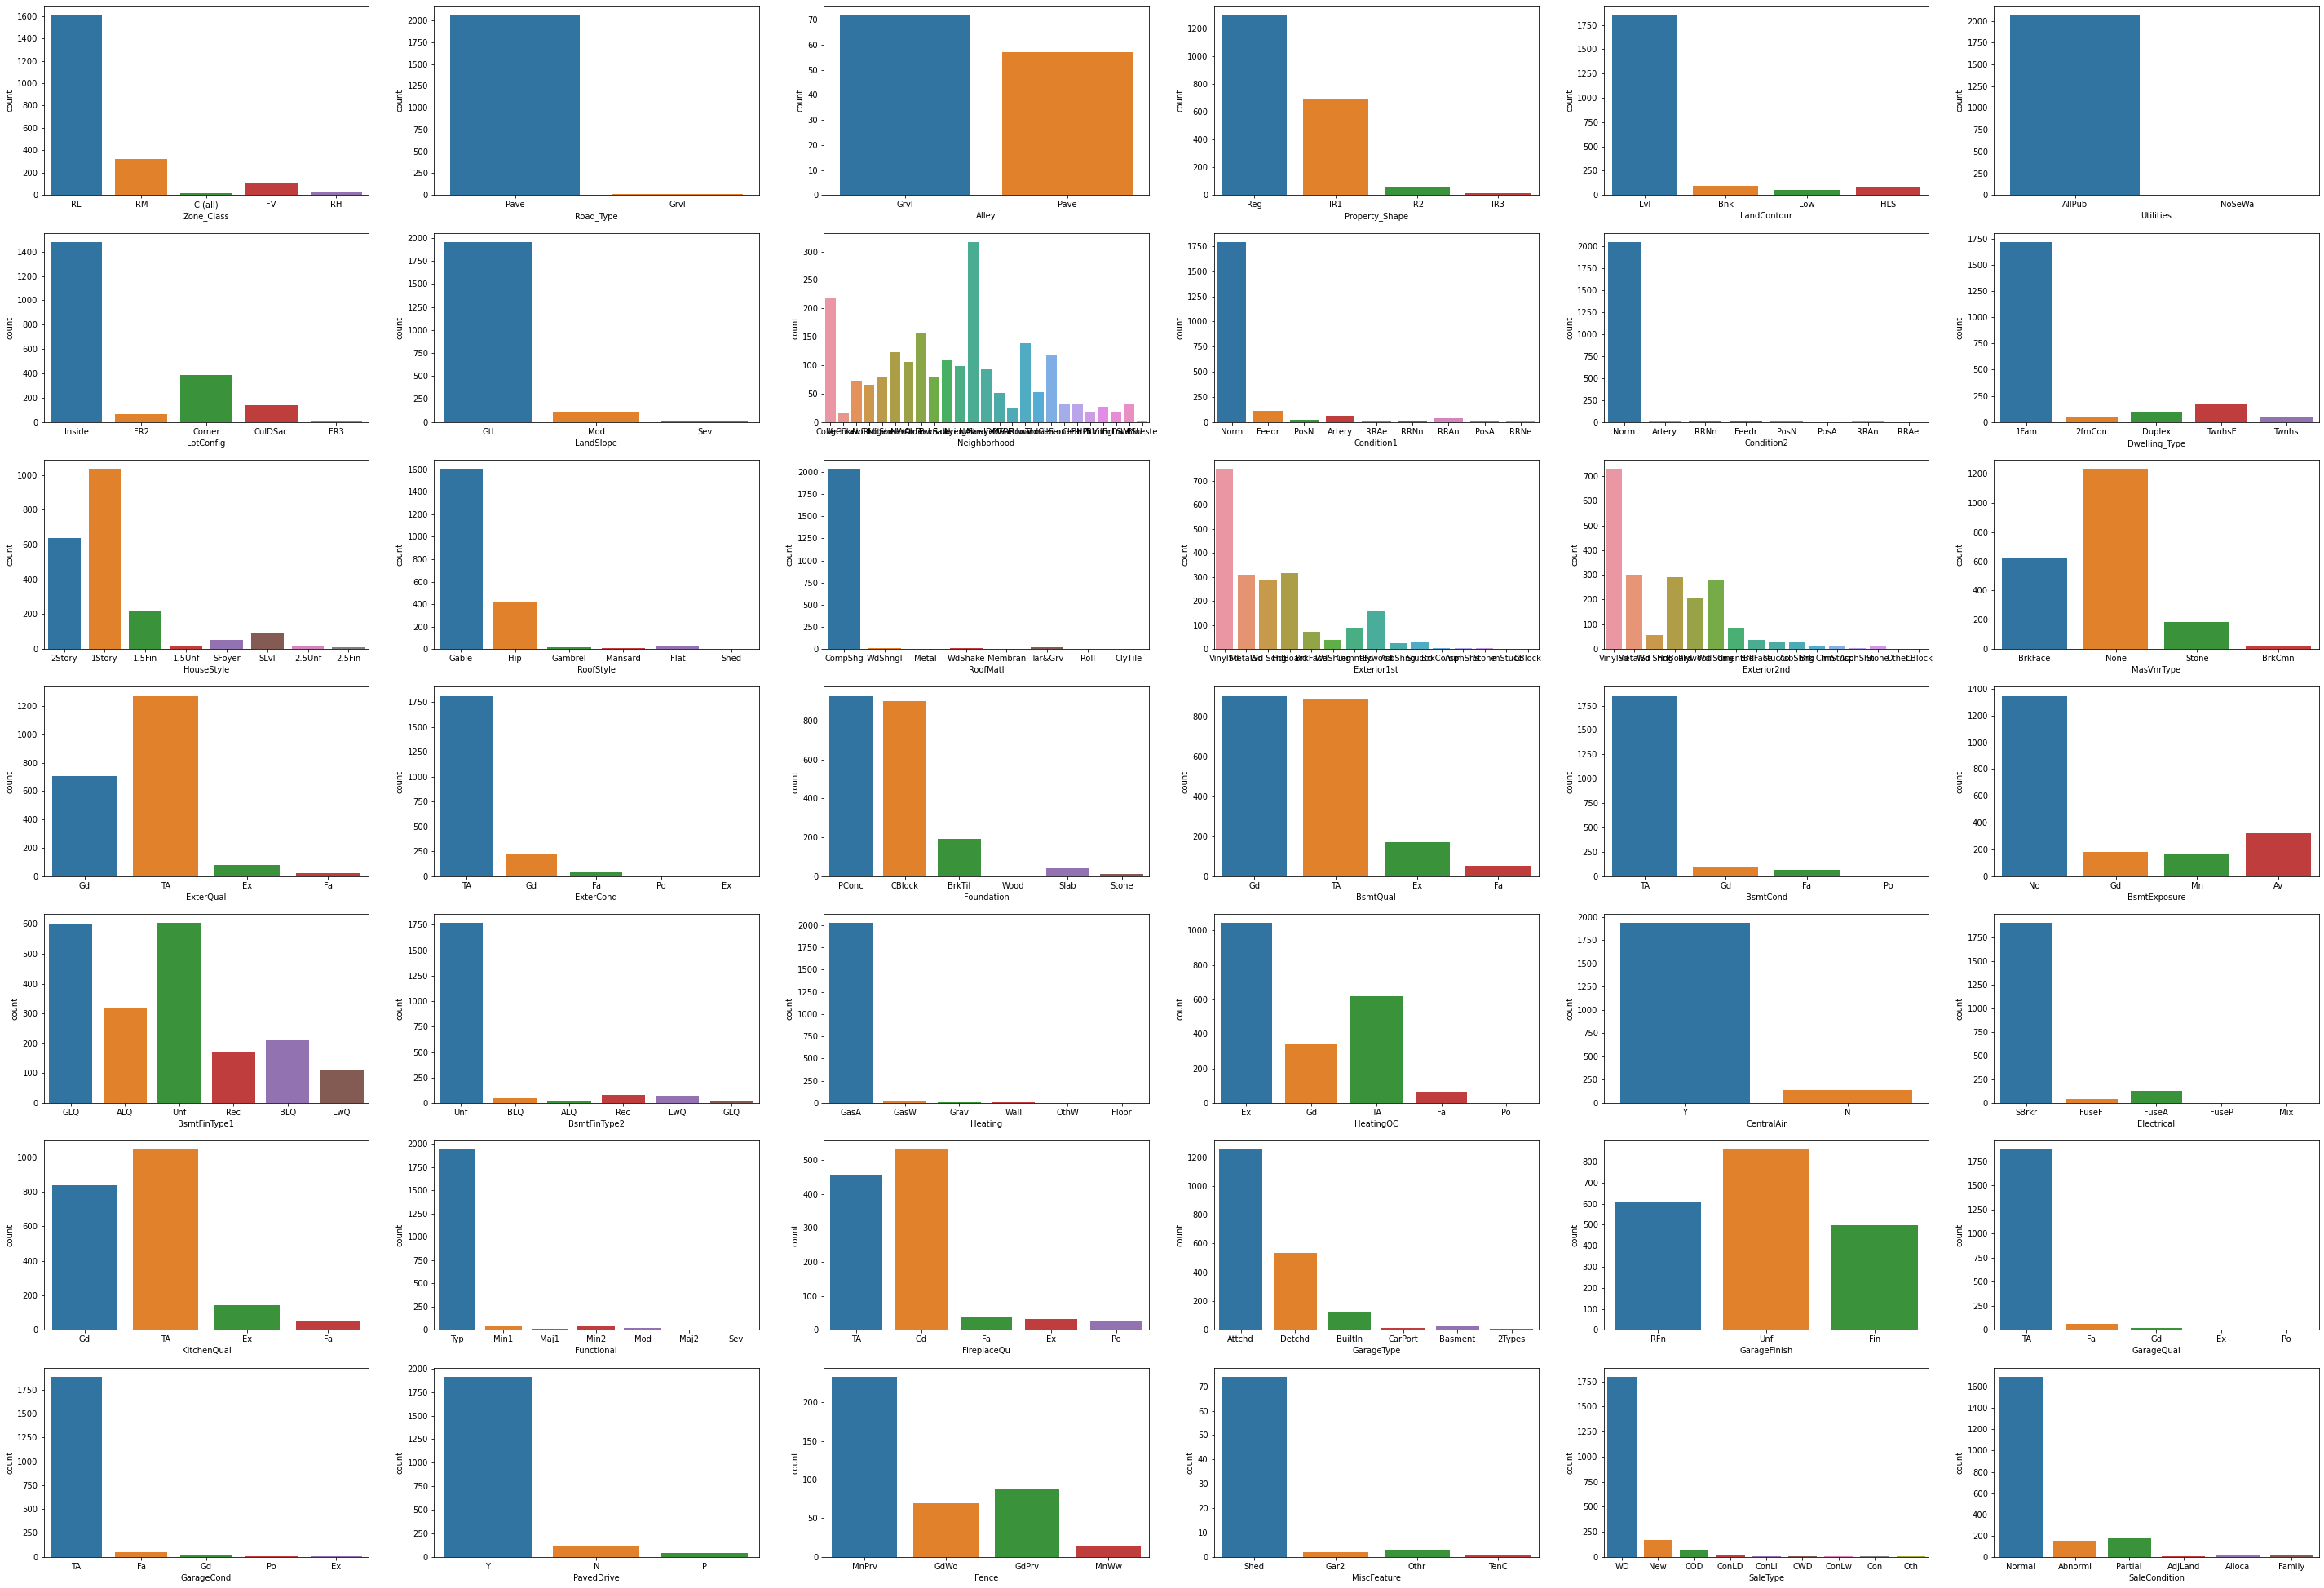

In [18]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in pp:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(pp[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(7, 6, figsize = (50, 35))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(pp[variable], ax = subplot)
    
# display the plot
plt.show()

# Boxplot of OverallQuality and Property_Sale_Price

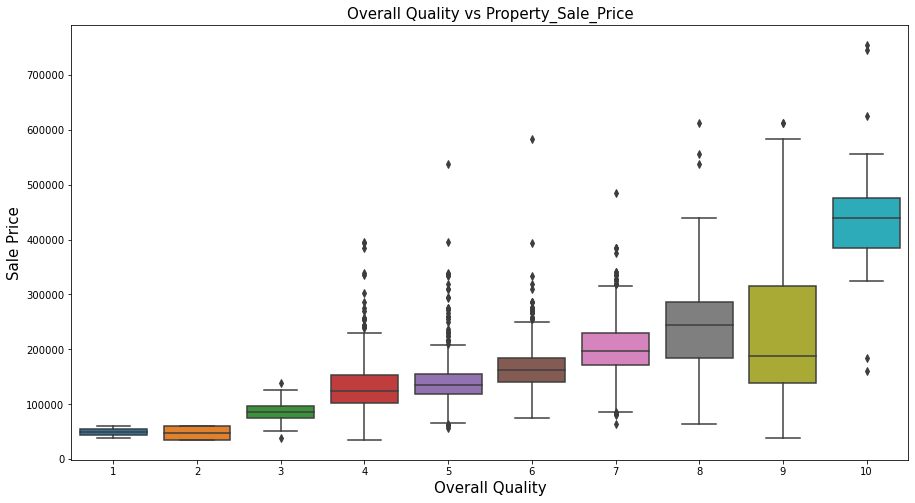

In [19]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallQual", data= pp)

# set the title of the plot and the fontsize
plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Quality", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

# Boxplot of Overall Condition and Property_Sale_Price

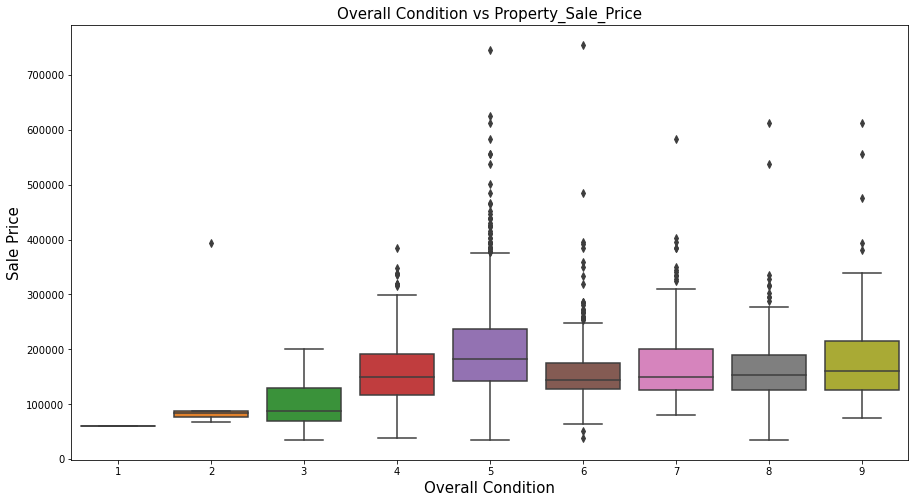

In [20]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= pp)

# set the title of the plot and the fontsize
plt.title("Overall Condition vs Property_Sale_Price", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Overall Condition", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Sale Price", fontsize=15)

# display the plot
plt.show()

# Pairplot for numerical values

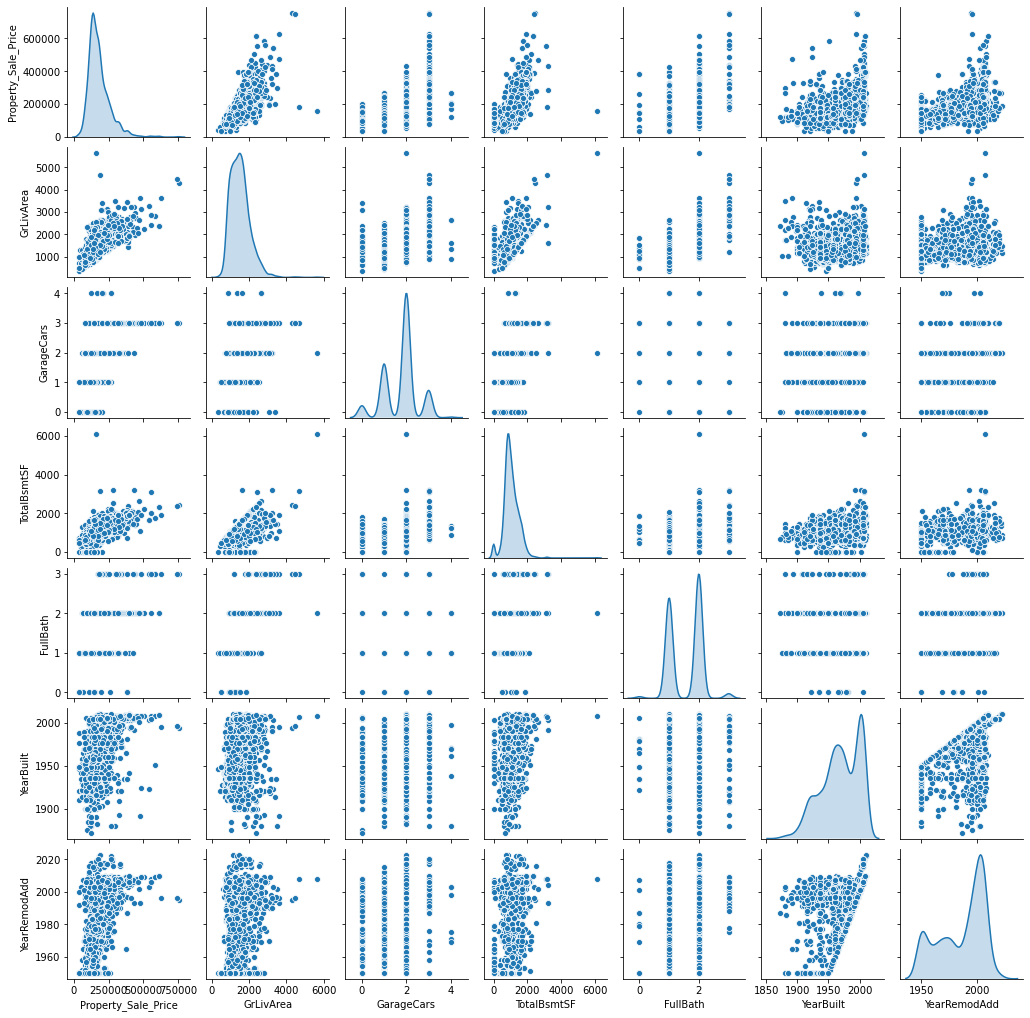

In [21]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(pp[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

# Outliers discovery

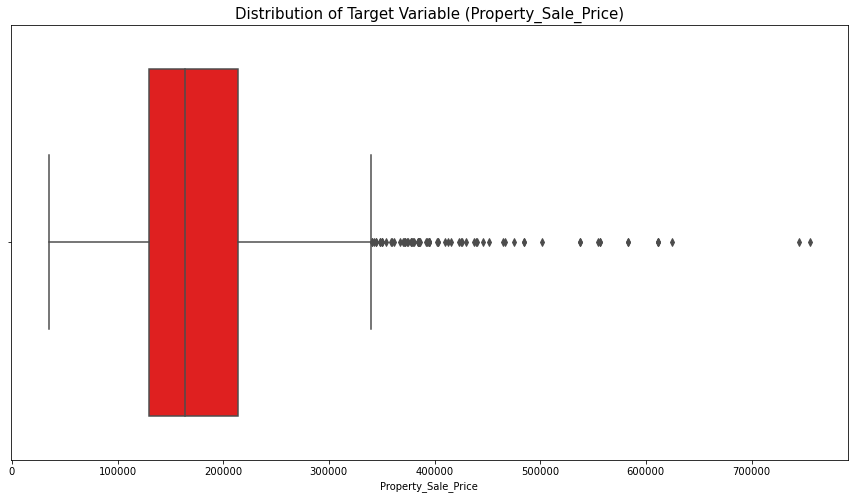

In [22]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(pp['Property_Sale_Price'], color='red')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

In [23]:
# remove the observations with the house price greater than or equal to 500000
# consider all the observations with the Property_Sale_Price less than 500000
df_house = pp[pp['Property_Sale_Price'] < 500000]

# check the dimension of the data
pp.shape

(2073, 78)

# Checking the missing values

In [24]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = pp.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (pp.isnull().sum()*100/df_house.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = pp[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
MiscFeature,1993,96.794560,object
Alley,1944,94.414764,object
Fence,1669,81.058766,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageCond,113,5.488101,object
GarageType,113,5.488101,object
GarageYrBlt,113,5.488101,float64
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object


# Visualize the missing values with heat map

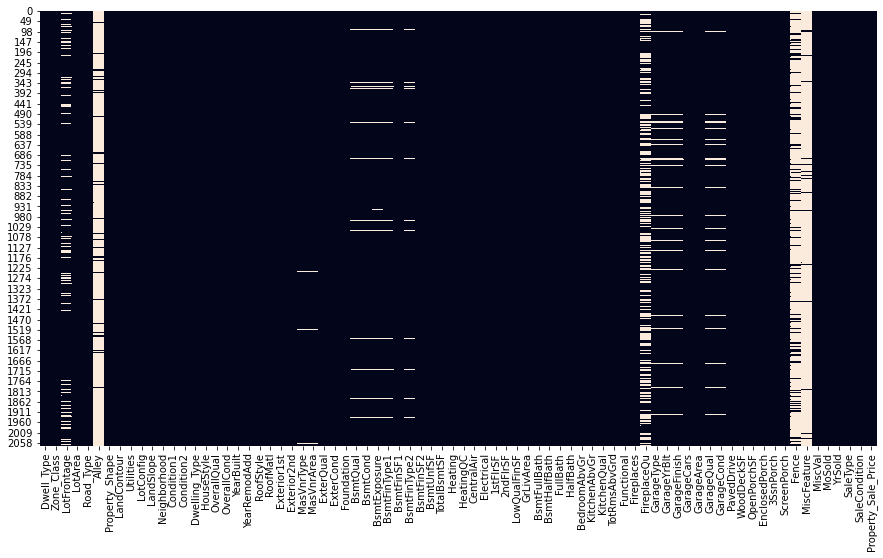

In [25]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(pp.isnull(), cbar=False)

# display the plot
plt.show()

# Replace the missing values in numerical variables

In [26]:
# consider the numeric variables with missing values
# pass the condition to filter the variables with number of missing values greater than zero and numeric data type
num_missing_values = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] != 'object')]
num_missing_values

,Total,Percentage of Missing Values,Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


In [27]:
# the variable 'LotFrontage' is positively skewed
# fill the missing values with its median value using fillna()
pp['LotFrontage'] = pp['LotFrontage'].fillna(pp['LotFrontage'].median())

In [28]:
# replace missing values in 'GarageYrBlt' with 0 using fillna() 
pp['GarageYrBlt'] = pp['GarageYrBlt'].fillna(0)

In [29]:
# the variable 'MasVnrArea' is positively skewed
# fill the missing values with its median value using fillna()
pp['MasVnrArea'] = pp['MasVnrArea'].fillna(pp['MasVnrArea'].median())

# Replace the missing values in categorical variables

In [30]:
# consider the categoric variables with missing values
# pass the condition to filter the variables with number of missing values greater than zero and categoric data type
cat_missing_values = missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] == 'object')]
cat_missing_values

,Total,Percentage of Missing Values,Type
MiscFeature,1993,96.794560,object
Alley,1944,94.414764,object
Fence,1669,81.058766,object
FireplaceQu,988,47.984458,object
GarageCond,113,5.488101,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [31]:
# according to the data definition, 'NA' denotes the absence of miscellaneous feature
# replace NA values in 'MiscFeature' with a valid value, 'None'
pp['MiscFeature'] = pp['MiscFeature'].fillna('None')

In [32]:
# according to the data definition, 'NA' denotes the absence of alley access
# replace NA values in 'Alley' with a valid value, 'No alley access' 
pp['Alley'] = pp['Alley'].fillna('No alley access')

In [33]:
# according to the data definition, 'NA' denotes the absence of fence
# replace NA values in 'Fence' with a valid value, 'No Fence'
pp['Fence'] = pp['Fence'].fillna('No Fence')

In [34]:
# according to the data definition, 'NA' denotes the absence of fireplace
# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
pp['FireplaceQu'] = pp['FireplaceQu'].fillna('No Fireplace')

#The dataframe missing_data shows that, all the variables containing the garage information have 81 missing values. This indicates that there are 81 observations for which garage facility is not available. Thus, we replace the missing values in the categoric variables representing the garage by No Garage.



In [35]:
# use 'for loop' to replace NA values in the below columns with a valid value, 'No Garage' 
# 'inplace = True' replace the null values in the original data
for col in ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']:
    pp[col].fillna('No Garage', inplace = True)

In [36]:
# according to the data definition, 'NA' denotes the absence of basement in the variabels 'BsmtQual', 'BsmtCond', 
# 'BsmtExposure', 'BsmtFinType1','BsmtFinType2'
# use 'for loop' to replace NA values with 'No Basement' in these columns 
# 'inplace = True' replace the null values in the original data
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    pp[col].fillna('No Basement', inplace = True)

In [37]:
# according to the data definition, 'NA' denotes the absence of masonry veneer
# replace NA values in 'MasVnrType' with a valid value, 'None'
pp['MasVnrType'] = pp['MasVnrType'].fillna('None')

In [38]:
# replace the null values in 'Electrical' with its mode
# calculate the mode of the 'Electrical'
mode_electrical = pp['Electrical'].mode()

# print mode of the 'Electrical'
print(mode_electrical)

0    SBrkr
dtype: object


In [39]:
# replace NA values in 'Electrical' with its mode, i.e. 'SBrkr'
pp['Electrical'].fillna('SBrkr' , inplace = True)

# After replacing the null values for the required variables, recheck the null values.

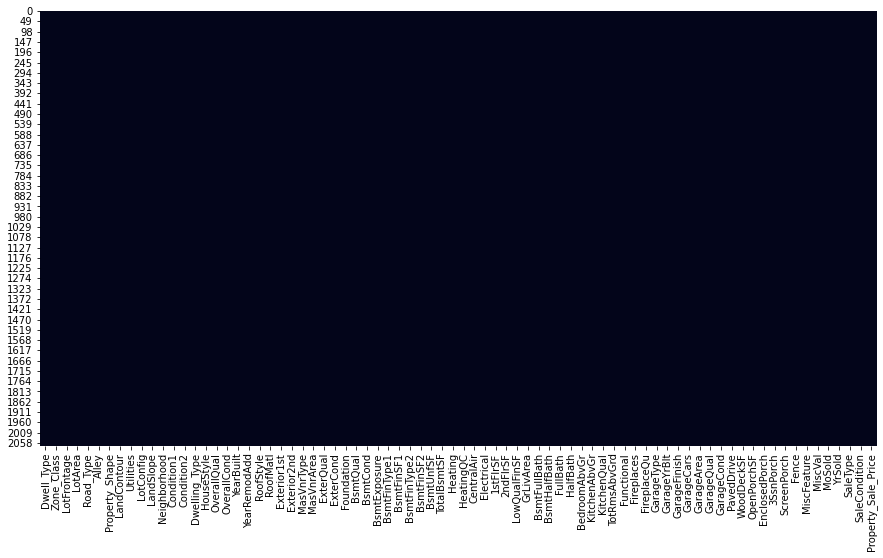

In [40]:
# recheck the null values
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(pp.isnull(), cbar=False)

# display the plot
plt.show()

# Correlation

In [41]:
#Compute a correlation matrix
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = pp.corr()

# print the correlation matrix
corrmat

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.074821,-0.033609,0.046278,0.033023,0.027194,0.042864,-0.004761,-0.034072,-0.025699,-0.022296,-0.068557,-0.078372,0.101374,0.004985,0.029368,-0.016284,-0.004521,0.056762,0.066188,-0.005343,0.074835,0.019444,-0.031639,-0.017173,-0.001193,-0.013785,0.004620,0.002153,-0.006529,-0.011966,-0.012021,-0.003942,-0.020589,0.018891,-0.017399
LotFrontage,-0.074821,1.000000,0.237671,0.102756,-0.010064,0.087191,0.096219,0.120832,0.127825,0.055646,0.107486,0.266406,0.326662,0.063484,0.023596,0.294203,0.079675,-0.035073,0.162273,0.042745,0.207837,0.007757,0.270876,0.201333,0.083068,0.222770,0.254081,0.071877,0.096519,-0.001668,0.036489,0.019767,-0.004010,0.023201,0.023203,0.268123
LotArea,-0.033609,0.237671,1.000000,0.078232,0.014209,-0.010551,0.017766,0.062115,0.164989,0.075875,0.000127,0.200794,0.244940,0.036583,-0.001199,0.209442,0.126283,0.031688,0.097835,0.003932,0.107307,-0.008350,0.155519,0.211193,0.065962,0.128792,0.144898,0.121530,0.064376,-0.023199,0.010594,0.035370,0.030949,-0.001707,-0.006478,0.211572
OverallQual,0.046278,0.102756,0.078232,1.000000,-0.010092,0.335326,0.379579,0.279854,0.163501,-0.058146,0.197844,0.354046,0.308402,0.209623,-0.013395,0.401340,0.084128,-0.047402,0.382428,0.190106,0.059223,-0.111588,0.272410,0.255236,0.208370,0.399407,0.373203,0.155307,0.217044,-0.080219,0.000451,0.021561,-0.034206,0.033685,-0.021130,0.523553
OverallCond,0.033023,-0.010064,0.014209,-0.010092,1.000000,-0.245303,0.084102,-0.081926,-0.035849,0.027023,-0.098924,-0.130098,-0.087931,0.013921,-0.009863,-0.053220,-0.029309,0.048357,-0.116006,-0.040809,-0.010460,-0.019415,-0.034231,-0.031404,-0.005237,-0.113676,-0.084758,0.013854,-0.042208,0.044501,0.017358,0.012021,0.041833,-0.025281,0.035050,-0.049926
YearBuilt,0.027194,0.087191,-0.010551,0.335326,-0.245303,1.000000,0.536129,0.262316,0.207941,-0.027220,0.118779,0.329629,0.235759,0.014821,-0.180458,0.167113,0.141150,-0.017865,0.399802,0.194491,-0.057069,-0.143619,0.080751,0.135165,0.219930,0.456665,0.406962,0.180472,0.179935,-0.322195,0.034056,-0.049156,-0.038620,0.027765,-0.006211,0.437662
YearRemodAdd,0.042864,0.096219,0.017766,0.379579,0.084102,0.536129,1.000000,0.162759,0.101401,-0.073927,0.198201,0.283802,0.224185,0.136079,-0.085126,0.270691,0.101714,-0.012083,0.422568,0.180755,-0.037185,-0.128308,0.173802,0.106243,0.112624,0.393252,0.336030,0.182932,0.221604,-0.177739,0.039945,-0.036832,-0.011749,0.033514,0.058932,0.475565
MasVnrArea,-0.004761,0.120832,0.062115,0.279854,-0.081926,0.262316,0.162759,1.000000,0.234769,-0.078481,0.123166,0.342396,0.317519,0.191617,-0.070496,0.387238,0.072890,0.027590,0.278268,0.202773,0.103659,-0.054252,0.275688,0.275477,0.131745,0.354392,0.359029,0.124656,0.137574,-0.096857,0.030168,0.064558,-0.034956,-0.020721,0.019743,0.478150
BsmtFinSF1,-0.034072,0.127825,0.164989,0.163501,-0.035849,0.207941,0.101401,0.234769,1.000000,-0.060739,-0.508612,0.485476,0.399249,-0.127193,-0.071539,0.176213,0.638649,0.079832,0.040933,0.014429,-0.130357,-0.090372,0.010932,0.220218,0.094935,0.195292,0.258896,0.207229,0.107593,-0.089326,0.045092,0.046826,-0.001520,-0.019242,0.030208,0.373276
BsmtFinSF2,-0.025699,0.055646,0.075875,-0.058146,0.027023,-0.027220,-0.073927,-0.078481,-0.060739,1.000000,-0.205860,0.106318,0.093606,-0.117249,-0.003688,-0.031610,0.170176,0.067096,-0.094622,-0.047104,-0.020047,-0.043127,-0.048872,0.039578,0.046140,-0.042863,-0.020975,0.073748,-0.001699,0.058107,-0.030341,0.099569,-0.002205,-0.016562,0.025510,-0.029042


# Heatmap for diagonal correlation matrix

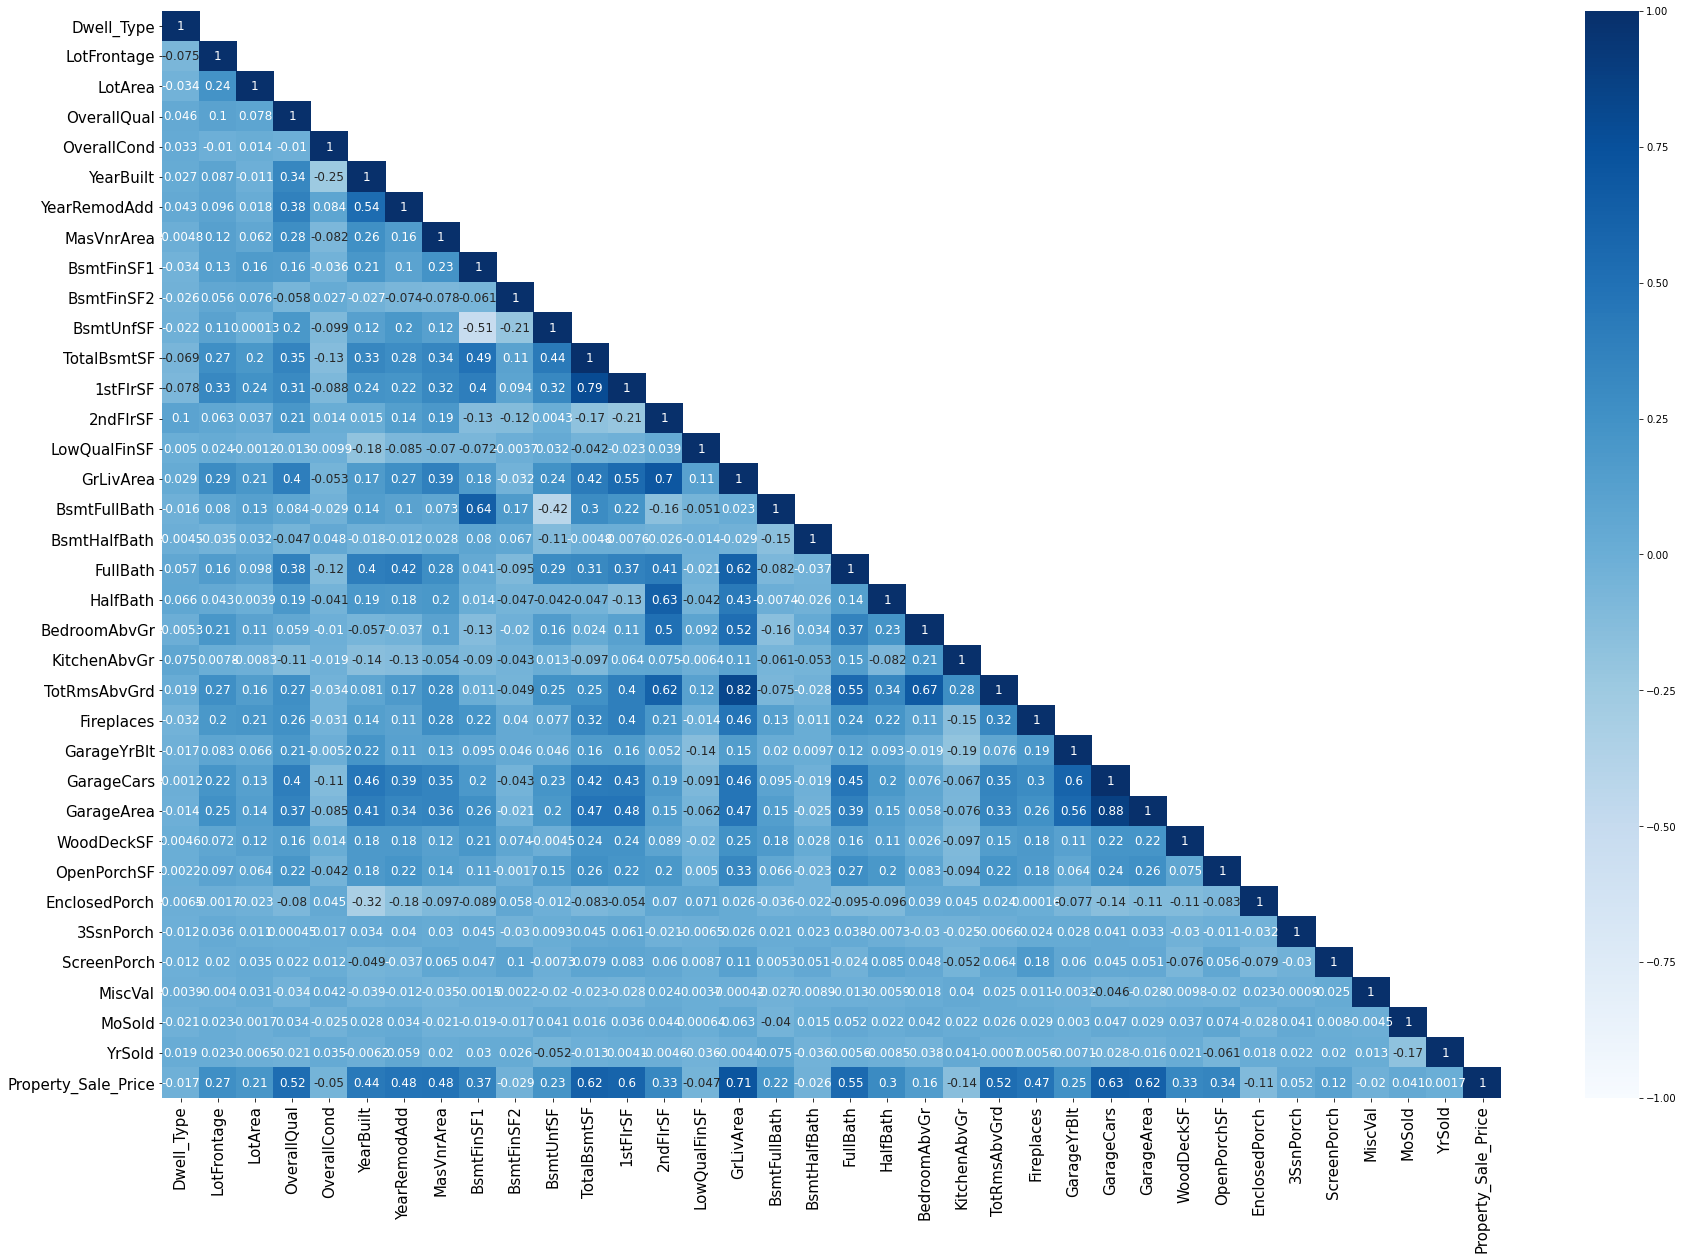

In [42]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

# Analysing relationships between target and categorical variables

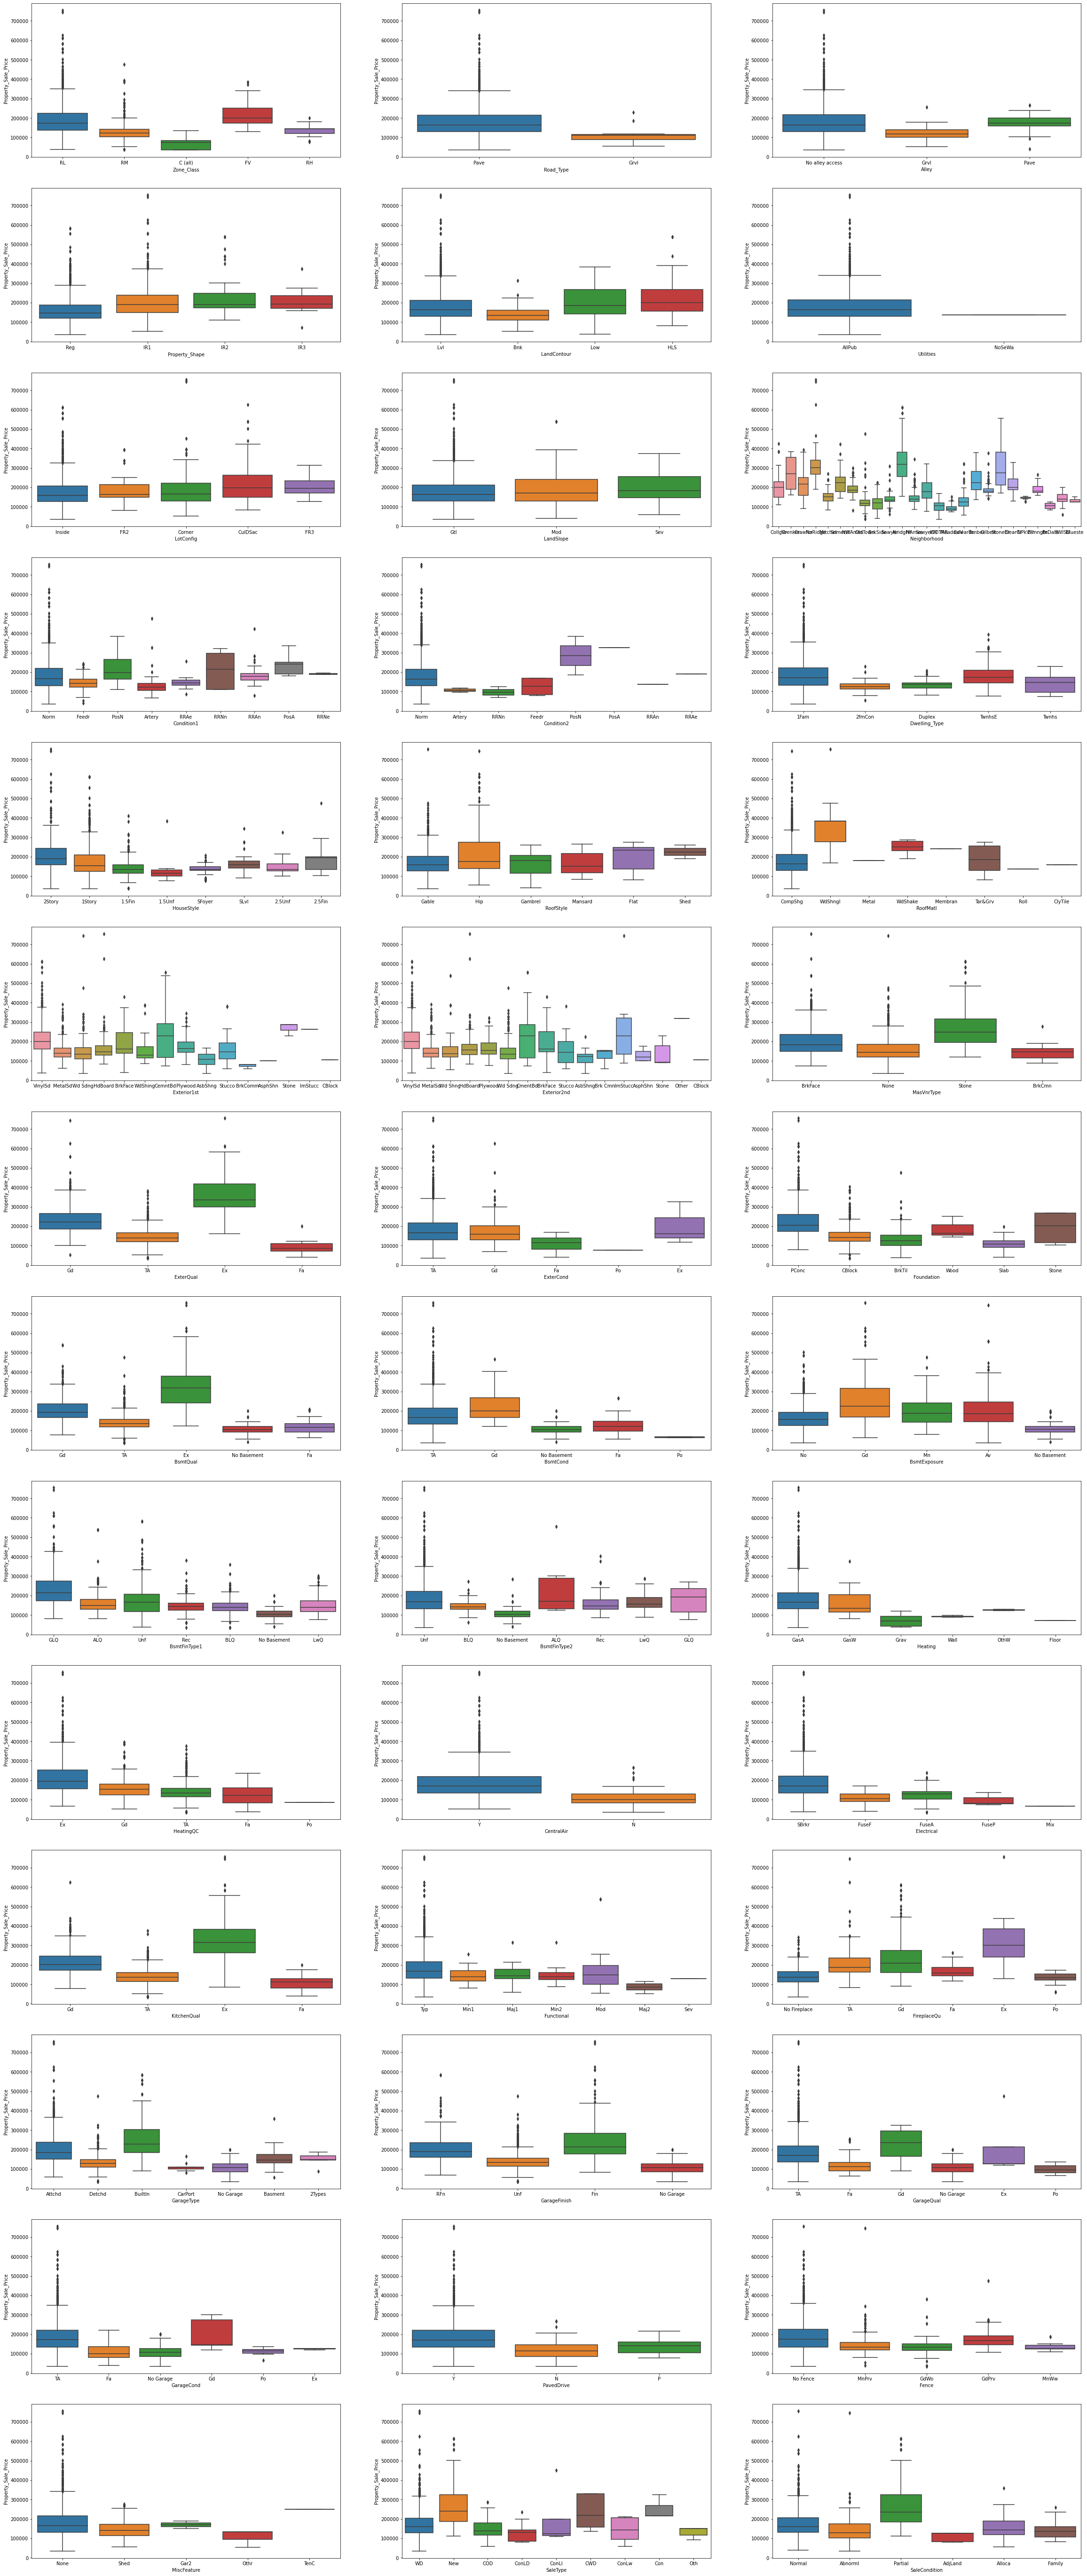

In [43]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in pp:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(pp[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the boxplot for each categorical and target variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 14, ncols = 3, figsize = (40, 100))

# use for loop to plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = pp, ax = subplot)
    
# display the plot
plt.show()

# Check for normality

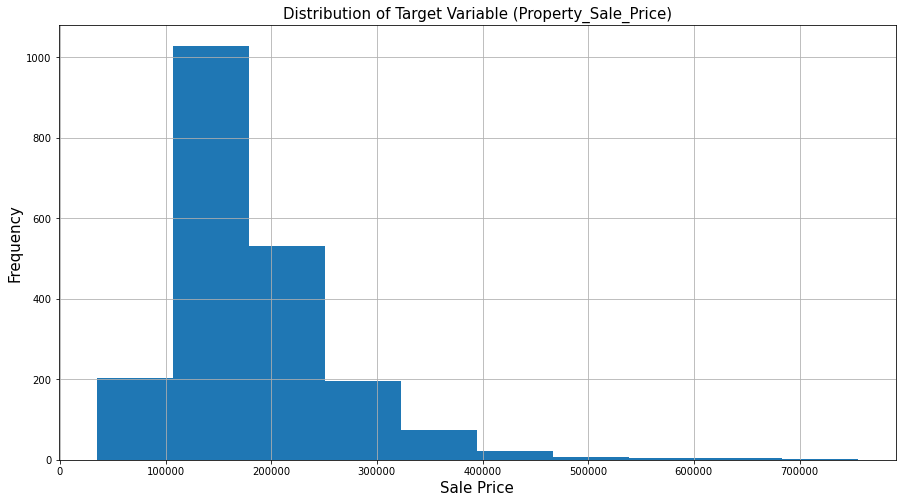

In [44]:
# check the distribution of target variable
pp.Property_Sale_Price.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

# Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows:

Ho: The data is normally distributed

H1: The data is not normally distributed

In [45]:
# normality test using shapiro()
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(pp.Property_Sale_Price)

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.874, p-value=0.000
The data is not normally distributed (reject H0)


# If the data is not normally distributed, use log transformation to get near normally distributed data

In [46]:
# log transformation for normality using np.log()
pp['log_Property_Sale_Price'] = np.log(pp['Property_Sale_Price'])

# display first 5 rows of the data
pp.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


# Recheck for normality by plotting histogram and performing Shapiro-Wilk test

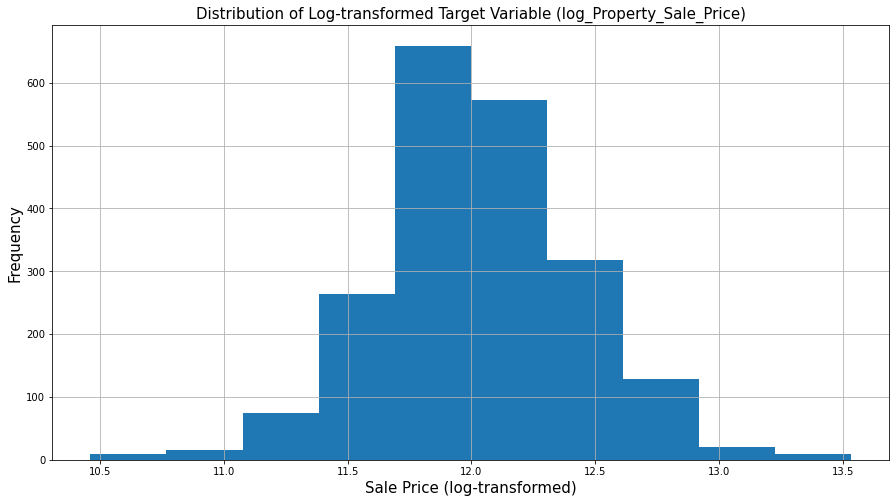

In [47]:
#Let us first plot a histogram of log_Property_Sale_Price.
# recheck for normality 
# plot the histogram using hist
pp.log_Property_Sale_Price.hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

# Let us perform Shapiro-Wilk test.

In [48]:
# check the normality by Shapiro-Wilk test
# the test returns the the test statistics and the p-value of the test
statn, pv = shapiro(pp['log_Property_Sale_Price'])

# to print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.990, p-value=0.000
The data is not normally distributed (reject H0)


In [49]:
# find the skewness of the variable log_Property_Sale_Price
pp['log_Property_Sale_Price'].skew()

0.07087740589797258

# Dummy encode the categorical variable

In [50]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = pp.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [51]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = pp.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
# Dummy encode the catergorical variables
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [53]:
#Concatenate numerical and dummy encoded categorical variables
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_house_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_house_dummy.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con

In [54]:
# check the shape of the dataframe
df_house_dummy.shape

(2073, 257)

#  Linear Regression (OLS)¶

Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)


In [55]:
#Split the data into training and test sets
# add the intercept column using 'add_constant()'
df_house_dummy = sm.add_constant(df_house_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_house_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_house_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1451, 256)
The shape of X_test is: (622, 256)
The shape of y_train is: (1451, 2)
The shape of y_test is: (622, 2)


# Build model using sm.OLS().fit()

In [56]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full_model_withlog = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.937
Model:                                 OLS   Adj. R-squared:                  0.925
Method:                      Least Squares   F-statistic:                     75.35
Date:                     Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                             06:56:10   Log-Likelihood:                 1300.5
No. Observations:                     1451   AIC:                            -2119.
Df Residuals:                         1210   BIC:                            -846.6
Df Model:                              240                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#  Predict the values using test set

In [57]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [58]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_full_model_withlog_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

# Compute accuracy measures

In [59]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

# Tabulate the results

In [60]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_model_withlog_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_withlog_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,31417.960205,0.937287,0.924848


# Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)¶

In [61]:
# build a full model using OLS()
# consider the Property_Sale_Price as the target variable
# use fit() to fit the model on train data
linreg_full_model_withoutlog = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.927
Model:                             OLS   Adj. R-squared:                  0.912
Method:                  Least Squares   F-statistic:                     63.63
Date:                 Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                         06:56:11   Log-Likelihood:                -16525.
No. Observations:                 1451   AIC:                         3.353e+04
Df Residuals:                     1210   BIC:                         3.480e+04
Df Model:                          240                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [62]:
# predict the 'Property_Sale_Price' using predict()
linreg_full_model_withoutlog_predictions = linreg_full_model_withoutlog.predict(X_test)


# Compute accuracy measures

In [63]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_Property_Sale_Price, linreg_full_model_withoutlog_predictions)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

In [64]:
# append the result table 
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_full_model_withoutlog_rmse,
                                                 'R-Squared': linreg_full_model_withoutlog_rsquared,
                                                 'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_model_withoutlog_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,31417.960205,0.937287,0.924848
1,Linreg full model without log of target variable,34097.173307,0.926580,0.912018
